# Predicting Employee Exit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df.left.unique()

array([1, 0], dtype=int64)

In [9]:
df.promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [10]:
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [11]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [13]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: xlabel='left', ylabel='count'>

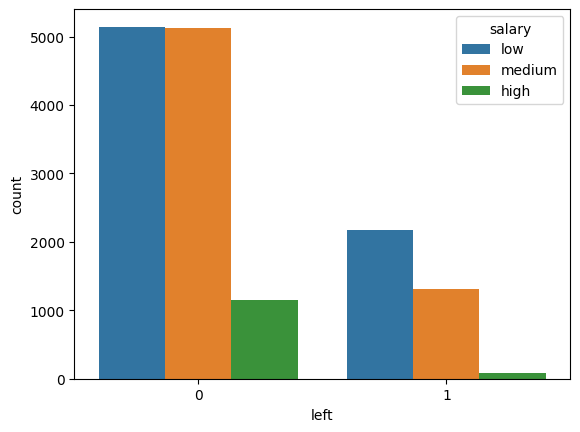

In [14]:
sns.countplot(x="left",data=df,hue="salary")

<Axes: ylabel='Density'>

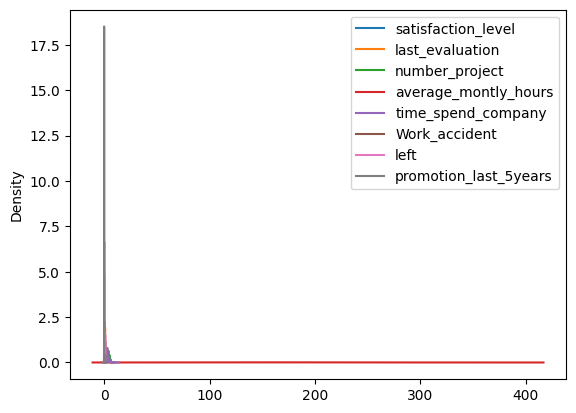

In [15]:
df.plot.kde()

In [16]:
salary_tf = pd.get_dummies(df["salary"],prefix="salary")

In [17]:
salary_tf

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [18]:
df = pd.concat([df,salary_tf],axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
sales_d = le.fit_transform(df.sales)

In [20]:
ohe = OneHotEncoder()
ohe_sales = ohe.fit_transform(sales_d.reshape(-1,1))

In [21]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [22]:
sales_df = pd.DataFrame(ohe_sales.toarray(), dtype=int,columns=le.classes_)

In [23]:
sales_df.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [24]:
df = pd.concat([df,sales_df],axis=1)

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [26]:
x = df.drop(["number_project","sales","salary","left"],axis=1).values
y= df["left"].values

In [27]:
x

array([[3.80e-01, 5.30e-01, 1.57e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [8.00e-01, 8.60e-01, 2.62e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.10e-01, 8.80e-01, 2.72e+02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.70e-01, 5.30e-01, 1.43e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.10e-01, 9.60e-01, 2.80e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.70e-01, 5.20e-01, 1.58e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [28]:
from sklearn import preprocessing
sr = preprocessing.StandardScaler()
x = sr.fit_transform(x)

In [29]:
x

array([[-0.93649469, -1.08727529, -0.88203988, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [ 0.75281433,  0.84070693,  1.22042276, ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       [-2.02247906,  0.95755433,  1.4206573 , ..., -0.25295305,
        -0.41779149, -0.4706553 ],
       ...,
       [-0.97671633, -1.08727529, -1.16236823, ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-2.02247906,  1.42494396,  1.58084493, ..., -0.25295305,
         2.39353848, -0.4706553 ],
       [-0.97671633, -1.14569899, -0.86201642, ..., -0.25295305,
         2.39353848, -0.4706553 ]])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [32]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [35]:
accuracy_score(y_test,y_pred)

0.7706666666666667

In [36]:
confusion_matrix(y_test,y_pred)

array([[3192,  270],
       [ 762,  276]], dtype=int64)

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty":["l1","l1"],
    "C" : np.logspace(-3,3,7),
    "solver": ["newton-cg", "ldfgs", "liblinear"]
}

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = GridSearchCV(lr,param_grid=parameters,scoring="accuracy",cv=10)

In [39]:
clf.fit(x_train, y_train)

c:\Users\praveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\praveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\praveen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\praveen\AppData\Local\Pr

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l1'],
                         'solver': ['newton-cg', 'ldfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
clf.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01,penalty="l1",solver="liblinear")
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.7751111111111111
